<a href="https://colab.research.google.com/github/ricochet-anr/TutoRico-2023/blob/main/TutoRico2_bispy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Bispy (Bivariate Signal with Python)
### [Documentation](https://bispy.readthedocs.io/en/latest/) 
The following exmaple are taken from the Bispy tutorials available [here] (https://bispy.readthedocs.io/en/latest/tutorials/index.html). Parts of the tutorial not reproduced here are a good source of examples for practicing on your own and enhancing your bispy skills (end of the session) 

First, we need to install the required packages and bispy package

In [2]:
!pip install numpy-quaternion
!git clone https://github.com/jflamant/bispy.git
!cd bispy/; ls; pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 4.0 MB/s eta 0:00:00 MB/s eta 0:00:01
Cloning into 'bispy'...
remote: Enumerating objects: 552, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 552 (delta 2), reused 4 (delta 2), pack-reused 543
Receiving objects: 100% (552/552), 4.78 MiB | 4.50 MiB/s, done.
Resolving deltas: 100% (276/276), done.
bispy  doc-requirements.txt  README.md	       scripts	 tests
doc    notebooks	     requirements.txt  setup.py
Processing /home/lebihann/Recherche/RICOCHET/2emeRicochet-APC-Juin-2023/TutoRico-2023/bispy
  Preparing metadata (setup.py) ... done
  Created wheel for bispy: filename=bispy-0.9.dev0-py3-none-any.whl size=24373 sha256=a616ecd2aa311a70093527f32370ed9b787fc9b26a5da526a56752f5aff8a2e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-mv964nah/wheels/bf/41/8f/47d8afe740cb40ce5d75b6b28e1830aa3928cae911c4bd34cf
Successfully built bispy


Now, import the different packages

In [3]:
import bispy as bsp
import numpy as np
import quaternion # load the quaternion module
import matplotlib.pyplot as plt

## Example 1 : linear chirps and Q-STFT

First, let's start with building and displaying a bivariate signal made of two linear chirps

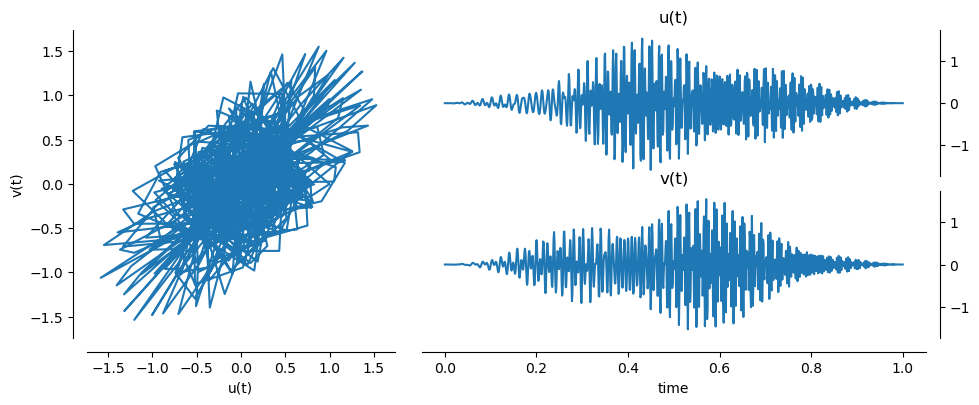

In [10]:
N = 1024 # length of the signal

# linear chirps constants
a = 250*np.pi
b = 50*np.pi
c = 150*np.pi

# time vector
t = np.linspace(0, 1, N)

# first chirp
theta1 = np.pi/4 # constant orientation
chi1 = np.pi/6-t # reversing ellipticity
phi1 = b*t+a*t**2 # linear chirp

# second chirp
theta2 = np.pi/4*10*t # rotating orientation
chi2 = 0 # constant null ellipticity
phi2 = c*t+a*t**2 # linear chirp

# common amplitude -- simply a window
env = bsp.utils.windows.hanning(N)

# define chirps x1 and x2
x1 = bsp.signals.bivariateAMFM(env, theta1, chi1, phi1)
x2 = bsp.signals.bivariateAMFM(env, theta2, chi2, phi2)

# sum it
x = x1 + x2

fig, ax = bsp.utils.visual.plot2D(t, x)

Next, we can compute the Quaternion Short Term Fourier Transform (Q-STFT) of the signal $x$

First step is to initialize the Q-STFT object

In [11]:
S = bsp.timefrequency.QSTFT(x,t)

Then compute :

In [12]:
S.compute(window='hamming', nperseg=101, noverlap=100, nfft=N)

Computing Time-Frequency Stokes parameters


From here, we can have a look at the Stokes parameters $S_0, S_1, S_2$ and $S_3
$

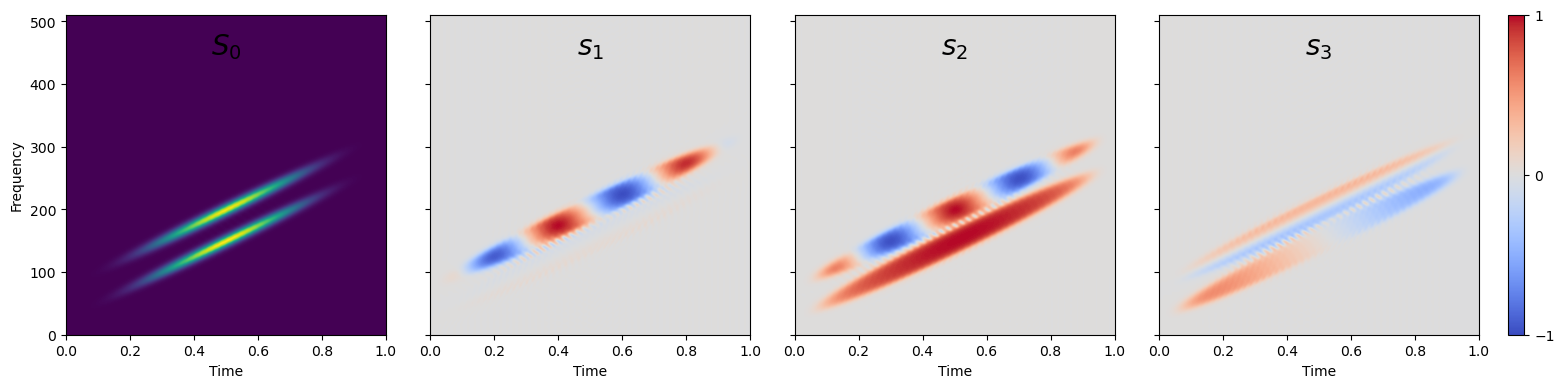

In [13]:
fig, ax = S.plotStokes()

An other way to represent the instantaneous polarization parameters is to locally (on the ridge) compute the ellipticity $\chi$ and orientation $\theta$ parameters.

First, we extract the ridges from the Q-STFT object


In [14]:
S.extractRidges()

Extracting ridges
Ridge added
Ridge added
2 ridges were recovered.


now we can plot the time-frequency representation (quivertdecim controls the decimation parameter for smooth display of the orientation paramter)

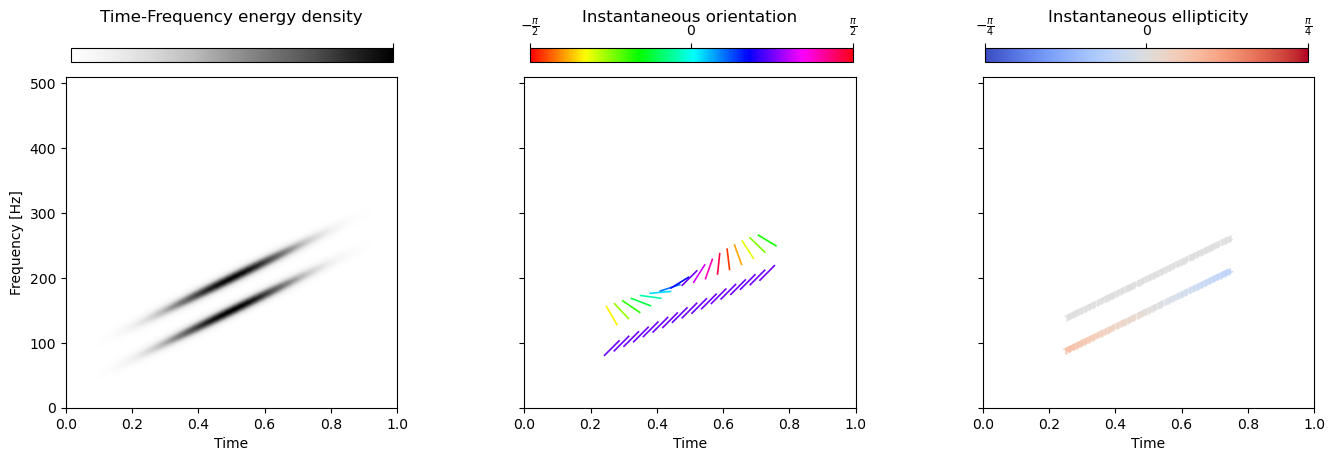

In [15]:
fig, ax = S.plotRidges(quivertdecim=30)

 The interpretation of the representations is left as an exercice....

## Example 2:  two hyperbolic chirps and Q-CWT

In this example, we construct two hyperbolic with distinct polarization parameters and analyze them using the Q-CWT (Quaternion-Continuous Wavelet Transform).  

In [16]:
N = 1024 # length of the signal

# hyperbolic chirps parameters
alpha = 15*np.pi
beta = 5*np.pi
tup = 0.8 # set blow-up time value

t = np.linspace(0, 1, N) # time vector

# chirp 1 parameters
theta1 = -np.pi/3 # constant orientation
chi1 = np.pi/6 # constant ellipticity
phi1 = alpha/(.8-t) # hyperbolic chirp

# chirp 2 parameters
theta2 = 5*t # rotating orientation
chi2 = -np.pi/10 # constant ellipticity
phi2 = beta/(.8-t) # hyperbolic chirp

# envelope
env = np.zeros(N)
Nmin = int(0.1*N) # minimum value of N such that x is nonzero
Nmax = int(0.75*N) # maximum value of N such that x is nonzero

env[Nmin:Nmax] = bsp.utils.windows.hanning(Nmax-Nmin)

# Constructing the bivariate signal as a sum of the two defined chirps
x1  = bsp.signals.bivariateAMFM(env, theta1, chi1, phi1)
x2  = bsp.signals.bivariateAMFM(env, theta2, chi2, phi2)

x = x1 + x2


Let's have a look at the signal

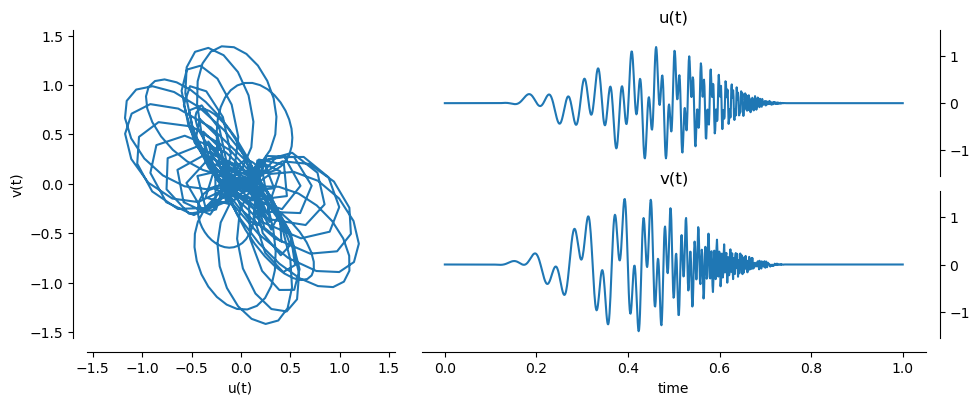

In [17]:
fig, ax = bsp.utils.visual.plot2D(t, x)

and now we compute the Q-CWT

In [18]:
waveletParams = dict(type='Morse', beta=12, gamma=3) # parameters of the Q-CWT
S = bsp.timefrequency.QCWT(x, t)

computation

In [19]:
fmin = 0.01
fmax = 400
S.compute(fmin, fmax, waveletParams, N)

Computing Time-Frequency Stokes parameters


and displaying

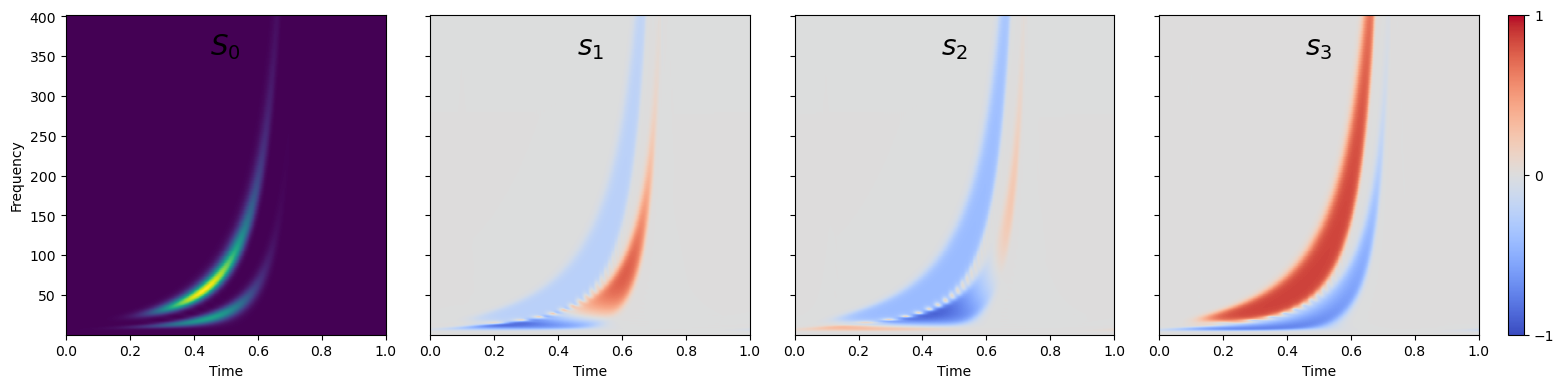

In [20]:
fig, ax = S.plotStokes()

and we can also use the other representation (using Euler parametrization of quaternions)

In [21]:
S.extractRidges()

Extracting ridges
Ridge added
Ridge added
2 ridges were recovered.


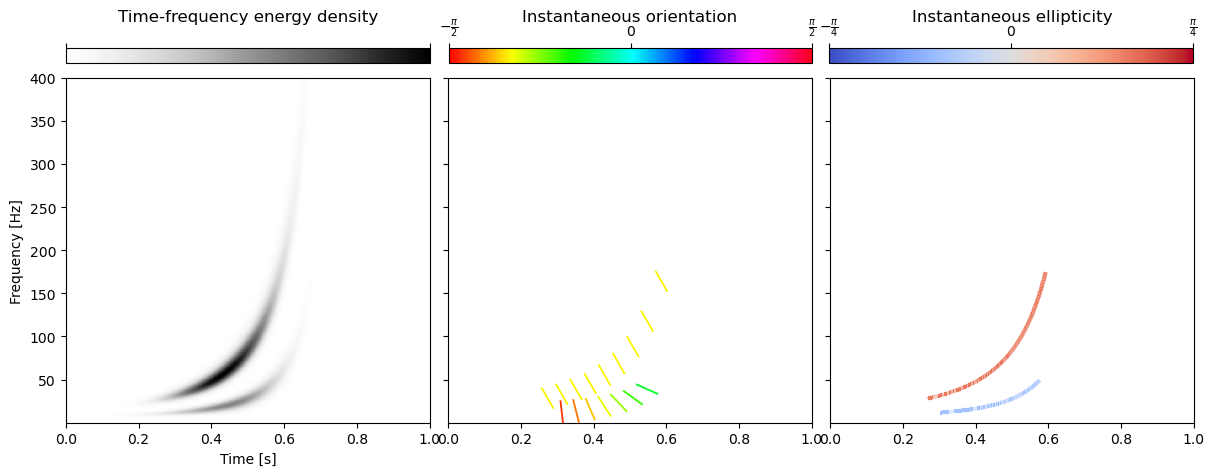

In [22]:
fig, ax = S.plotRidges(quivertdecim=40)

### Now that you are an expert at bivariate signal processing, you can either move on to the tutorial on spectral analysis of stationnary random bivariate signals available [here](https://bispy.readthedocs.io/en/latest/tutorials/spectralanalysis.html) and try to reproduce the proposed examples. Or, you can explore the other functionalities of bispy by roaming around in the [refernce manual](https://bispy.readthedocs.io/en/latest/reference.html) 